# Demodulación FM Empleando Radios Definidas por Software para el curso EL4005

## Importamos las librerias

In [1]:
import struct
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

In [2]:
#Lo que deben realizar es escoger uno de los archivos “muestras_XXXMHz.bin” y analizar el espectro
#de las muestras capturadas y obtener el audio de cada una de las estaciones en el archivo de muestras
#elegido. 
data = open("muestras_88_9.bin", "rb").read()

In [9]:
# PRUEBA DE LECTURA DE DATOS

I,Q=struct.unpack("@ii", data[0:8])
# the complex data is  y = I + jQ.
print(I+1j*Q)

(-153187914-1326035020j)


In [10]:
#Para leer el archivo binario es importante notar que correpsonden a signed int de 8 bits, por lo que cada 8 bits 
#se tienen muestras nuevas
print(int(len(data)/8))
señal= []
for i in range(int(len(data)/8)):
    I,Q=struct.unpack("@ii", data[8*i:8*(i+1)])
    # the complex data is  y = I + jQ.
    señal.append(I+1j*Q)

2500000


In [11]:
w, h = signal.freqz(señal,1, np.arange(-5*10**6,5*10**6,.01*10**6))

<ipython-input-12-762840505e39>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)


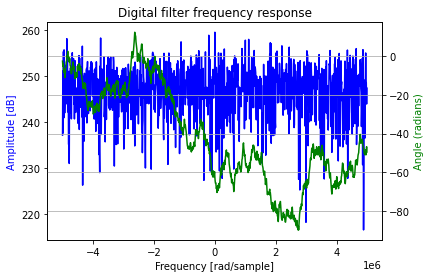

In [12]:
fig = plt.figure()
plt.title('Digital filter frequency response')
ax1 = fig.add_subplot(111)

#frecuencia de muestreo
fs = 
f = w * fs/(2*np.pi)

plt.plot(f , 20 * np.log10(abs(h)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
plt.plot(w, angles, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.grid()
plt.axis('tight')
plt.show()